# Measuring Influence on Instagram

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [5]:
usersData = pd.read_csv('instagram_data/usersData.csv', sep=',')
display(usersData.shape)
usersData.head(20)

(114781, 7)

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
0,97.5000,3.0000,13178.0,1967.0,113,59,333.1667
1,91.7500,9.2500,4228.0,1402.0,174,39,308.6250
2,33.0000,3.5000,2212.0,2471.0,46,23,126.7500
3,20.0000,3.5000,203.0,1838.0,26,16,65.5000
4,13.2000,1.2000,132.0,309.0,18,9,61.2000
5,109.1111,8.8889,2074.0,1583.0,215,60,638.4444
6,153.0000,12.6667,1718.0,4865.0,246,37,428.6667
7,50.5000,12.5000,511.0,739.0,62,35,148.1667
8,35.0000,0.6000,1216.0,2435.0,42,25,117.6000
9,32.0000,6.0000,1019.0,8328.0,53,14,90.0000


In [6]:
usersData.describe()

,avg_likes,avg_comments,avg_followers,avg_posts,max_likes,min_likes,avg_views
count,1.147810e+05,114781.000000,1.147810e+05,114781.000000,1.147810e+05,1.147810e+05,1.147810e+05
mean,8.980949e+02,27.756262,6.016005e+04,995.570356,1.365752e+03,5.694098e+02,7.276758e+03
std,1.063233e+04,774.559009,1.115905e+06,1927.328265,1.490799e+04,7.615014e+03,7.385628e+04
min,1.000000e+00,0.000000,3.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.500000e+00
25%,7.966670e+01,2.833300,1.384000e+03,194.000000,1.080000e+02,4.800000e+01,2.213333e+02
50%,1.579286e+02,6.571400,4.583000e+03,479.000000,2.150000e+02,1.050000e+02,6.073333e+02
75%,3.745000e+02,14.800000,1.626000e+04,1105.000000,5.460000e+02,2.400000e+02,2.072500e+03
max,1.629037e+06,242543.187500,2.316562e+08,140014.000000,2.068986e+06,1.279511e+06,1.283367e+07


In [7]:
followers_views = pd.read_csv('instagram_data/followers_views.csv', sep=',')
display(followers_views.shape)
followers_views.head(20)

(1422894, 2)

,followers,views
0,13178,250
1,13178,604
2,13178,239
3,13178,858
4,13178,271
5,13178,317
6,13178,318
7,13178,126
8,4228,372
9,4228,404


In [8]:
followers_views[followers_views.followers<followers_views.views]

,followers,views
226,11592,20880
244,6693,12449
245,6693,7031
365,19985,23627
468,41142,69495
469,41142,55574
870,481,971
871,481,882
872,481,993
883,1089,1363


In [9]:
followers_views.describe()

,followers,views
count,1.422894e+06,1.422894e+06
mean,1.019482e+05,1.697887e+04
std,1.426782e+06,3.572234e+05
min,0.000000e+00,1.000000e+00
25%,1.786000e+03,2.620000e+02
50%,6.393000e+03,8.350000e+02
75%,2.342400e+04,3.814000e+03
max,2.312398e+08,2.825005e+08


In [10]:
likes_views = pd.read_csv('instagram_data/likes_views.csv', sep=',')
display(likes_views.shape)
likes_views.head(20)

(1426188, 2)

,likes,views
0,98,250
1,100,604
2,109,239
3,103,858
4,106,271
5,59,317
6,113,318
7,57,126
8,172,372
9,87,404


In [11]:
likes_views[likes_views.likes>likes_views.views]

,likes,views
308,105,3
330,129,122
574,127,68
575,139,75
576,123,121
578,125,49
612,30,1
700,61,60
719,53,12
724,13,4


In [12]:
likes_views.describe()

,likes,views
count,1.426188e+06,1.426188e+06
mean,1.512143e+03,1.706994e+04
std,1.306588e+04,3.570242e+05
min,1.000000e+00,1.000000e+00
25%,8.900000e+01,2.620000e+02
50%,1.930000e+02,8.350000e+02
75%,5.550000e+02,3.820000e+03
max,2.085029e+06,2.825005e+08


## Plots

In [13]:
log_avg_views=[]
for i in range(len(usersData['avg_views'])):
    log_avg_views.append(math.log((usersData['avg_views'])[i],10))
    
log_log_avg_views=[]
for i in log_avg_views:
    log_log_avg_views.append(math.log(i,10))
    
m = np.mean(log_log_avg_views)
n = pow(10,m)
res = pow(10,n)
res

578.2659697898988

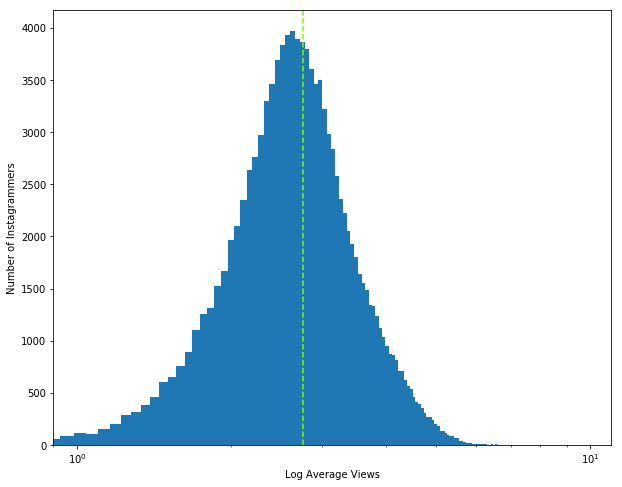

In [14]:
plt.figure(figsize=(10,8))
plt.hist(log_avg_views,bins=120)
plt.ylabel('Number of Instagrammers')
plt.xlabel('Log Average Views')
plt.xscale('log')
plt.xlim(0.9,11)
plt.axvline(x=n, linestyle = '--', color = 'lawngreen')
plt.show()

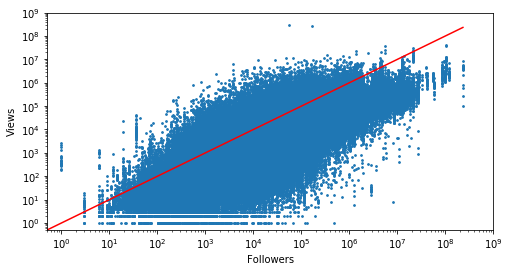

In [15]:
f = plt.figure() 
f.set_figwidth(8) 
f.set_figheight(4) 


plt.scatter(followers_views['followers'],followers_views['views'],s=3)
plt.xlabel('Followers')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)
x = np.linspace(followers_views['followers'].min(),followers_views['followers'].max(),1000)
plt.plot(x,x, c="red")
plt.show()

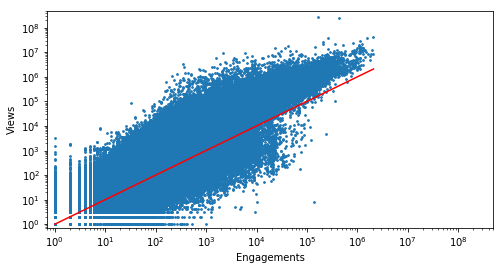

In [16]:
f = plt.figure() 
f.set_figwidth(8) 
f.set_figheight(4) 

plt.scatter(likes_views['likes'],likes_views['views'],s=3)
plt.xlabel('Engagements')
plt.ylabel('Views')
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.7,500000000)
plt.ylim(0.7,500000000)
x = np.linspace(likes_views['likes'].min(),likes_views['likes'].max(),1000)
plt.plot(x,x, c="red")
plt.show()

## Univariate Outliers Removal

In [17]:
# Wir haben weniger user als im paper angegeben
# vielleicht haben wir schon daten ohne outlier
# überhaupt müsste man posts removen nicht users oder?
# Wir haben für user avgerage statistics wo über posts mitteln oder?
# Ja stimmt, außerdem wissen wir ja gar nicht welche views von den Tabellen followers_views und likes_views 
# zu welchen Usern gehören oder?

## Transform Data

In [18]:
X = usersData[["avg_comments"]]
X.insert(0, "avg_likes", usersData["avg_likes"] / np.log(usersData["avg_likes"]))
X.insert(2, "avg_followers", usersData["avg_followers"] / np.log(usersData["avg_followers"]))
X.insert(3, "like_follow_geom_mean", np.sqrt(usersData["avg_likes"] * usersData["avg_followers"]))
X.insert(4, "follower_post_ratio", usersData["avg_followers"] / usersData["avg_posts"])
X.insert(5, "comment_like_ratio", usersData["avg_comments"] / usersData["avg_likes"])
X.insert(6,"focus_ratio", usersData["max_likes"] / usersData["min_likes"])
X.insert(7, "focus_diff", usersData["max_likes"] - usersData["min_likes"])
X.insert(8, "avg_views", usersData["avg_views"])

X = X.replace(np.inf, np.nan)

X.isna().sum() 

avg_likes                4
avg_comments             0
avg_followers            0
like_follow_geom_mean    0
follower_post_ratio      0
comment_like_ratio       0
focus_ratio              0
focus_diff               0
avg_views                0
dtype: int64

In [19]:
X = X.dropna()
X_y = X

In [20]:
y = X["avg_views"] # influence
X = X.drop("avg_views", axis=1)

In [21]:
X

,avg_likes,avg_comments,avg_followers,like_follow_geom_mean,follower_post_ratio,comment_like_ratio,focus_ratio,focus_diff
0,21.288896,3.0000,1389.160618,1133.514446,6.699542,0.030769,1.915254,54
1,20.302861,9.2500,506.378577,622.831438,3.015692,0.100817,4.461538,135
2,9.437989,3.5000,287.211094,270.177719,0.895184,0.106061,2.000000,23
3,6.676164,3.5000,38.206687,63.718129,0.110446,0.175000,1.625000,10
4,5.115849,1.2000,27.033659,41.742065,0.427184,0.090909,2.000000,9
5,23.252893,8.8889,271.564272,475.706234,1.310171,0.081467,3.583333,155
6,30.414847,12.6667,230.637582,512.692891,0.353135,0.082789,6.648649,209
7,12.876171,12.5000,81.938697,160.640904,0.691475,0.247525,1.771429,27
8,9.844324,0.6000,171.187508,206.300751,0.499384,0.017143,1.680000,17
9,9.233248,6.0000,147.114512,180.576853,0.122358,0.187500,3.785714,39


In [22]:
y

0           333.1667
1           308.6250
2           126.7500
3            65.5000
4            61.2000
5           638.4444
6           428.6667
7           148.1667
8           117.6000
9            90.0000
10        27327.2500
11          239.8571
12          118.5000
13           83.3333
14          588.0000
15           55.6923
16           94.6842
17          123.5000
18          327.2500
19           67.7500
20          387.8000
21          114.8571
22        16152.0000
23          194.1429
24          985.6667
25           61.0000
26           81.6667
27         3521.5714
28          125.0000
29          995.5714
             ...    
114751      876.0000
114752      120.2000
114753      373.0000
114754       28.2500
114755      264.0000
114756       26.5000
114757      130.0526
114758      495.6250
114759      220.3333
114760       16.6667
114761      987.0000
114762       63.8889
114763       14.2222
114764     2917.6667
114765      107.0000
114766     1588.0000
114767    728

In [23]:
n, p = X.shape
(n, p)

(114777, 8)

## Base Lines

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, cross_val_predict
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [25]:
def spearmanr_metric(y, y_pred):
    return spearmanr(y, y_pred).correlation

spearmanr_scorer = make_scorer(spearmanr_metric)

In [26]:
follower_base = LinearRegression()
followers = X[["avg_followers"]]

In [27]:
follower_base.fit(followers, y)
y_pred = follower_base.predict(followers)

In [28]:
r2s = []
#adj_r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base, followers, y, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    #adj_r2s.append(1-(1-r2)*(n-1)/(n-p-1))
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.211")

R2 0.2622750205379368 +/- 0.05948407016237918
Paper: 0.211


In [29]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base, followers, y, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.757")

rs 0.7530932960774865 +/- 1.9957492866263253e-05
Paper: 0.757


In [30]:
likes_base = LinearRegression()
likes = X[["avg_likes"]]

In [31]:
r2s = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    likes_base_cv = cross_validate(likes_base, likes, y, cv=cv, scoring='r2')
    r2 = likes_base_cv["test_score"].mean()
    r2s.append(r2)


print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.666")

R2 0.6820664657850227 +/- 0.02221072582895045
Paper: 0.666


In [32]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    likes_base_cv = cross_validate(likes_base, likes, y, cv=cv, scoring=spearmanr_scorer)
    rss.append(likes_base_cv["test_score"].mean())
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.859")

rs 0.8452386211217109 +/- 1.6489065019892967e-05
Paper: 0.859


## Ridge Regression

In [33]:
cv_gen = KFold(5, shuffle=True, random_state=0)

In [34]:
rr = Ridge(random_state=0)

In [35]:
rr_cv = cross_validate(rr, X, y, cv=cv_gen, scoring='r2')
rr_cv["test_score"].mean()
# paper: 0.725

0.4902328765617193

In [36]:
rr_cv = cross_validate(rr, X, y, cv=cv_gen, scoring=spearmanr_scorer)
rr_cv["test_score"].mean()
# paper: 0.848

0.8262037992543467

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {
    'random_state': [0,1,2,3,4],
    'alpha': [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5., 10, 20, 50, 100]
}

In [39]:
rr = Ridge()
rr_gs = GridSearchCV(rr, params, n_jobs=-1, verbose=2)
rr_gs.fit(X, y)
rr_gs_res = rr_gs.cv_results_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.3s finished


In [40]:
pd.DataFrame(rr_gs_res)[["params","mean_test_score"]].sort_values("mean_test_score", ascending=False)

,params,mean_test_score
79,"{'alpha': 100, 'random_state': 4}",0.624825
78,"{'alpha': 100, 'random_state': 3}",0.624825
77,"{'alpha': 100, 'random_state': 2}",0.624825
76,"{'alpha': 100, 'random_state': 1}",0.624825
75,"{'alpha': 100, 'random_state': 0}",0.624825
71,"{'alpha': 50, 'random_state': 1}",0.624649
70,"{'alpha': 50, 'random_state': 0}",0.624649
72,"{'alpha': 50, 'random_state': 2}",0.624649
73,"{'alpha': 50, 'random_state': 3}",0.624649
74,"{'alpha': 50, 'random_state': 4}",0.624649


In [41]:
from sklearn.feature_selection import RFECV

In [42]:
%%time
rr = Ridge(random_state=0)
rr_rfe = RFECV(rr, step=1, cv=5, n_jobs=-1, verbose=2)
rr_rfe.fit(X, y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Wall time: 1.23 s


In [43]:
rr_rfe.ranking_

array([1, 2, 6, 5, 7, 1, 3, 4])

In [44]:
rr_rfe.support_

array([ True, False, False, False, False,  True, False, False])

In [45]:
rr_rfe.n_features_

2

## Minimal Ridge Regression

In [46]:
Xmin = X[["avg_likes","comment_like_ratio"]]

In [47]:
rr_cv = cross_validate(rr, Xmin, y, cv=cv_gen, scoring='r2')
rr_cv["test_score"].mean()
# paper: 0.723

0.6054489875732983

In [48]:
rr_cv = cross_validate(rr, Xmin, y, cv=cv_gen, scoring=spearmanr_scorer)
rr_cv["test_score"].mean()
# paper: 0.818

0.8421084767757965

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor(random_state=0)

In [45]:
%%time
rfr_cv = cross_validate(rfr, X, y, cv=cv_gen, scoring='r2', n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.626

CPU times: user 42 ms, sys: 43.5 ms, total: 85.5 ms
Wall time: 4min 8s


0.5337963772471165

In [46]:
%%time
rfr_cv = cross_validate(rfr, X, y, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
rfr_cv["test_score"].mean()
# paper: 0.869 

CPU times: user 42.3 ms, sys: 45.1 ms, total: 87.4 ms
Wall time: 4min 4s


0.867989744529938

In [47]:
%%time
rfr = RandomForestRegressor(random_state=0)
rfr_rfe = RFECV(rfr, step=1, cv=5, n_jobs=-1, verbose=2)
rfr_rfe.fit(X, y)

CPU times: user 3min 36s, sys: 1.1 s, total: 3min 37s
Wall time: 20min 19s


RFECV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
      verbose=2)

In [51]:
rfr_rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
rfr_rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [53]:
rfr_rfe.n_features_

8

## Minimal Random Forest

No changes compared to full RF - recursive feauture elimination does not eliminate any features.

## Multi-Regression

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Baselines

In [50]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[['avg_followers']],y)

KMeans(n_clusters=2)

(0.5, 1000000000)

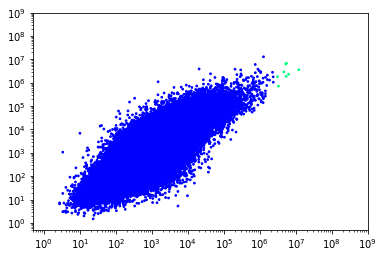

In [51]:
plt.scatter(X[['avg_followers']], y, c=kmeans.labels_, cmap='winter',s=3)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.5,1000000000)
plt.ylim(0.5,1000000000)

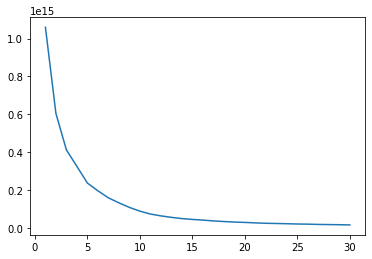

In [89]:
upper_bound = 30

models = []
inertia = []
iterations = []

for k in range(1,upper_bound+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_y[['avg_followers','avg_views']])
    models.append(kmeans)
    inertia.append(kmeans.inertia_)
    iterations.append(kmeans.n_iter_)

plt.plot(range(1,upper_bound+1),inertia)
plt.show()

In [90]:
silhouette_scores = []
for model in  models[1:]:
    silhouette_scores.append(
        silhouette_score(X = X_y[['avg_followers','avg_views']] , labels = model.labels_ , metric='euclidean'))
    print('*')
plt.plot(range(2,upper_bound+1),silhouette_scores)
plt.show()

*
*
*
*
*
*
*
*
*
*


KeyboardInterrupt: 

In [91]:
silhouette_scores

[0.9968915338303932,
 0.9894194087558161,
 0.9894294843231253,
 0.9768492781044915,
 0.9603744707896552,
 0.9624776558833047,
 0.9637271761488337,
 0.9615535912436831,
 0.958967585172242,
 0.9383551013426222]

In [92]:
def argmax(iterable):
    return max(enumerate(iterable), key=lambda x: x[1])[0]

kmeans = models[argmax(silhouette_scores)+1] 
kmeans

KMeans(n_clusters=2)

In [52]:
y = kmeans.labels_
cluster_1 = X_y[y == 0] 
cluster_2 = X_y[y == 1] 

In [53]:
y1 = cluster_1["avg_views"]
X1 = cluster_1[["avg_followers"]]
y2 = cluster_2["avg_views"]
X2 = cluster_2[["avg_followers"]]

In [54]:
follower_base_multi1 = LinearRegression()
follower_base_multi1.fit(X1, y1)
y_pred_multi1 = follower_base_multi1.predict(X1)

In [55]:
follower_base_multi2 = LinearRegression()
follower_base_multi2.fit(X2, y2)
y_pred_multi2 = follower_base_multi2.predict(X2)

In [56]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m1=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 0.28177112318040853 +/- 0.0183823488795634
Paper: 0.204


In [57]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m2=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

R2 nan +/- nan
Paper: 0.204


C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

In [58]:
(m1+m2)/2

nan

In [112]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs1 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.7529571980820908 +/- 2.1851269857498463e-05
Paper: 0.725


In [113]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs2 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.12779999999999997 +/- 0.23891245258462354
Paper: 0.725


In [114]:
(rs1+rs2)/2

0.44037859904104537

In [115]:
y1 = cluster_1["avg_views"]
X1 = cluster_1[["avg_likes"]]
y2 = cluster_2["avg_views"]
X2 = cluster_2[["avg_likes"]]

In [116]:
follower_base_multi1 = LinearRegression()
follower_base_multi1.fit(X1, y1)
y_pred_multi1 = follower_base_multi1.predict(X1)

In [117]:
follower_base_multi2 = LinearRegression()
follower_base_multi2.fit(X2, y2)
y_pred_multi2 = follower_base_multi2.predict(X2)

In [118]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m1=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 0.6841767849653192 +/- 0.0035781918074417733
Paper: 0.204


In [119]:
r2s = []

for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring='r2')
    r2 =follower_base_cv["test_score"].mean()
    r2s.append(r2)
    
m2=np.mean(r2s)
    
print("R2", np.mean(r2s), "+/-", np.std(r2s))
print("Paper: 0.204")

R2 -2.6390412257005176 +/- 2.94927758607524
Paper: 0.204


In [120]:
(m1+m2)/2

-0.9774322203675991

In [121]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi1, X1, y1, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs1 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.8451527352374572 +/- 1.557532533105827e-05
Paper: 0.725


In [122]:
rss = []
for i in range(100):
    cv = KFold(5, shuffle=True, random_state=i)
    follower_base_cv = cross_validate(follower_base_multi2, X2, y2, cv=cv, scoring=spearmanr_scorer)
    rss.append(follower_base_cv["test_score"].mean())
rs2 =np.mean(rss)
print("rs", np.mean(rss), "+/-", np.std(rss))
print("Paper: 0.725")

rs 0.14959999999999998 +/- 0.16575837837044616
Paper: 0.725


In [123]:
(rs1+rs2)/2

0.49737636761872855

### Ridge Regression

In [59]:
y1 = cluster_1["avg_views"]
X1 = cluster_1.drop("avg_views", axis=1)
y2 = cluster_2["avg_views"]
X2 = cluster_2.drop("avg_views", axis=1)

In [60]:
cv_gen = KFold(5, shuffle=True, random_state=0)

In [61]:
rr = Ridge(random_state=0)

In [62]:
rr_cv = cross_validate(rr, X1, y1, cv=cv_gen, scoring='r2')
r1=rr_cv["test_score"].mean()
r1
# paper: 0.727

0.6023528471122633

In [63]:
rr_cv = cross_validate(rr, X2, y2, cv=cv_gen, scoring='r2')
r2=rr_cv["test_score"].mean()
r2
# paper: 0.727

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [136]:
(r1+r2)/2

-33.44899838857622

In [133]:
rr_cv = cross_validate(rr, X1, y1, cv=cv_gen, scoring=spearmanr_scorer)
s1=rr_cv["test_score"].mean()
s1
# paper: 0.821

0.8462637147607438

In [134]:
rr_cv = cross_validate(rr, X2, y2, cv=cv_gen, scoring=spearmanr_scorer)
s2=rr_cv["test_score"].mean()
s2
# paper: 0.821

0.12000000000000002

In [135]:
(s1+s2)/2

0.4831318573803719

## Minimal Ridge Regression Multiregression


In [64]:
X1min = X1[["avg_likes","comment_like_ratio"]]
X2min = X2[["avg_likes","comment_like_ratio"]]

In [65]:
rr_cv = cross_validate(rr, X1min, y1, cv=cv_gen, scoring='r2')
r1=rr_cv["test_score"].mean()
r1
# paper: 0.727

0.6024609795894224

In [66]:
rr_cv = cross_validate(rr, X2min, y2, cv=cv_gen, scoring='r2')
r2=rr_cv["test_score"].mean()
r2
# paper: 0.727

C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Laurin\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [ ]:
(r1+r2)/2

In [67]:
rr_cv = cross_validate(rr, X1min, y1, cv=cv_gen, scoring=spearmanr_scorer)
s1=rr_cv["test_score"].mean()
s1
# paper: 0.818

0.8361471739189785

In [68]:
rr_cv = cross_validate(rr, X2min, y2, cv=cv_gen, scoring=spearmanr_scorer)
s2=rr_cv["test_score"].mean()
s2
# paper: 0.821

nan

In [69]:
(s1+s2)/2

nan

### Random Forest

In [ ]:
y1 = cluster_1["avg_views"]
X1 = cluster_1.drop("avg_views", axis=1)
y2 = cluster_2["avg_views"]
X2 = cluster_2.drop("avg_views", axis=1)

In [139]:
rfr = RandomForestRegressor(random_state=0)

In [145]:
%%time
rfr_cv = cross_validate(rfr, X1, y1, cv=cv_gen, scoring='r2', n_jobs=-1)
r1=rfr_cv["test_score"].mean()
r1
# paper: 0.621

CPU times: user 37.6 ms, sys: 24.5 ms, total: 62.1 ms
Wall time: 1min 45s


0.7395229287678871

In [146]:
%%time
rfr_cv = cross_validate(rfr, X2, y2, cv=cv_gen, scoring='r2', n_jobs=-1)
r2=rfr_cv["test_score"].mean()
r2
# paper: 0.621

CPU times: user 11.1 ms, sys: 2.73 ms, total: 13.9 ms
Wall time: 225 ms


-0.9528744953732071

In [147]:
(r1+r2)/2

-0.10667578330266003

In [142]:
%%time
rfr_cv = cross_validate(rfr, X1, y1, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
s1=rfr_cv["test_score"].mean()
s1
# paper: 0.861 

CPU times: user 36.6 ms, sys: 24.1 ms, total: 60.8 ms
Wall time: 1min 47s


0.868155712668153

In [143]:
%%time
rfr_cv = cross_validate(rfr, X2, y2, cv=cv_gen, scoring=spearmanr_scorer, n_jobs=-1)
s2=rfr_cv["test_score"].mean()
s2
# paper: 0.861

CPU times: user 10.8 ms, sys: 2.69 ms, total: 13.5 ms
Wall time: 408 ms


0.45999999999999996

In [144]:
(s1+s2)/2

0.6640778563340765

## Minimal Random Forest Multiregression

empty